In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib notebook
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


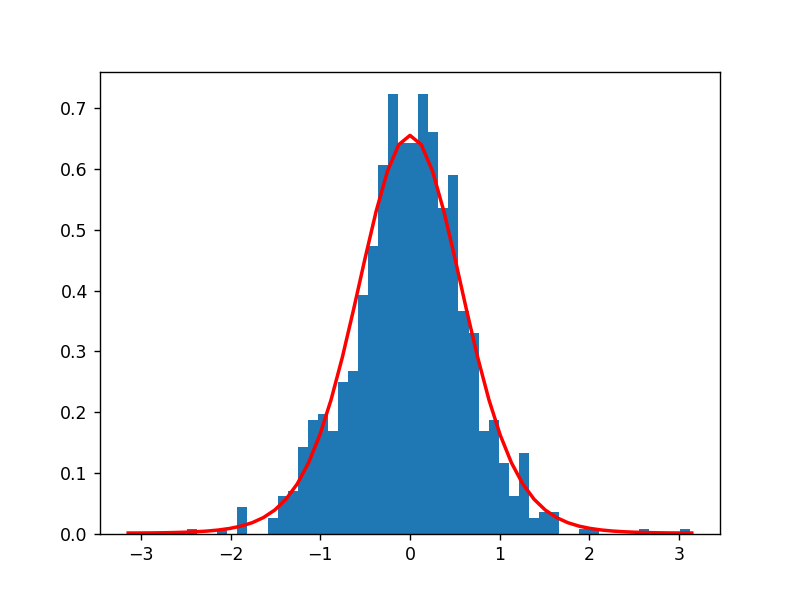

In [2]:
# von Mises distribution

mu, kappa = 0.0, 3.0 # mean and dispersion
s = np.random.vonmises(mu, kappa, 1000)
# print(s)

import matplotlib.pyplot as plt
from scipy.special import i0  
plt.hist(s, 50, density=True)
x = np.linspace(-np.pi, np.pi, num=51)
y = np.exp(kappa*np.cos(x-mu))/(2*np.pi*i0(kappa))  
plt.plot(x, y, linewidth=2, color='r')  
plt.show()

In [3]:
class robot:
    def __init__(self,x,y,theta):
        self.x = x
        self.y = y
        self.theta = theta
        
    def move(self,v,w,dt=0.1):
        self.x += v*np.cos(self.theta)*dt
        self.y += v*np.sin(self.theta)*dt
        self.theta += w*dt
        self.theta = normalize(self.theta)
    
    def move_rw(self,L,Theta,dt=0.1):
        self.theta += Theta
        self.theta = normalize(self.theta)
        self.x += L*np.cos(self.theta)
        self.y += L*np.sin(self.theta)
        
def normalize(theta):
    return np.arctan2(np.cos(theta),np.sin(theta))
        

<IPython.core.display.Javascript object>


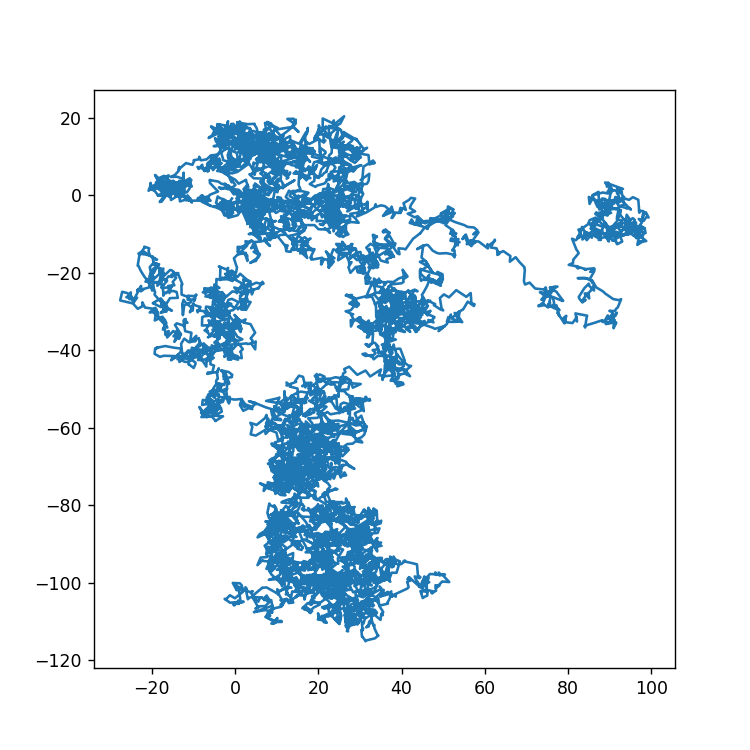

In [7]:
# Brownian motion
x = []
y = []
mu_v, kappa_v = 0.0, .3 # mean and dispersion
s_v = np.random.vonmises(mu_v, kappa_v, 10000)
mu_g, sigma_g = 1, 1 # mean and standard deviation
s_g = np.random.normal(mu_g, sigma_g, 10000)
robot1 = robot(0,0,0)
for i in range(10000):
    robot1.move_rw(s_g[i],normalize(s_v[i]))
    x.append(robot1.x)
    y.append(robot1.y)

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(x,y)    

<IPython.core.display.Javascript object>


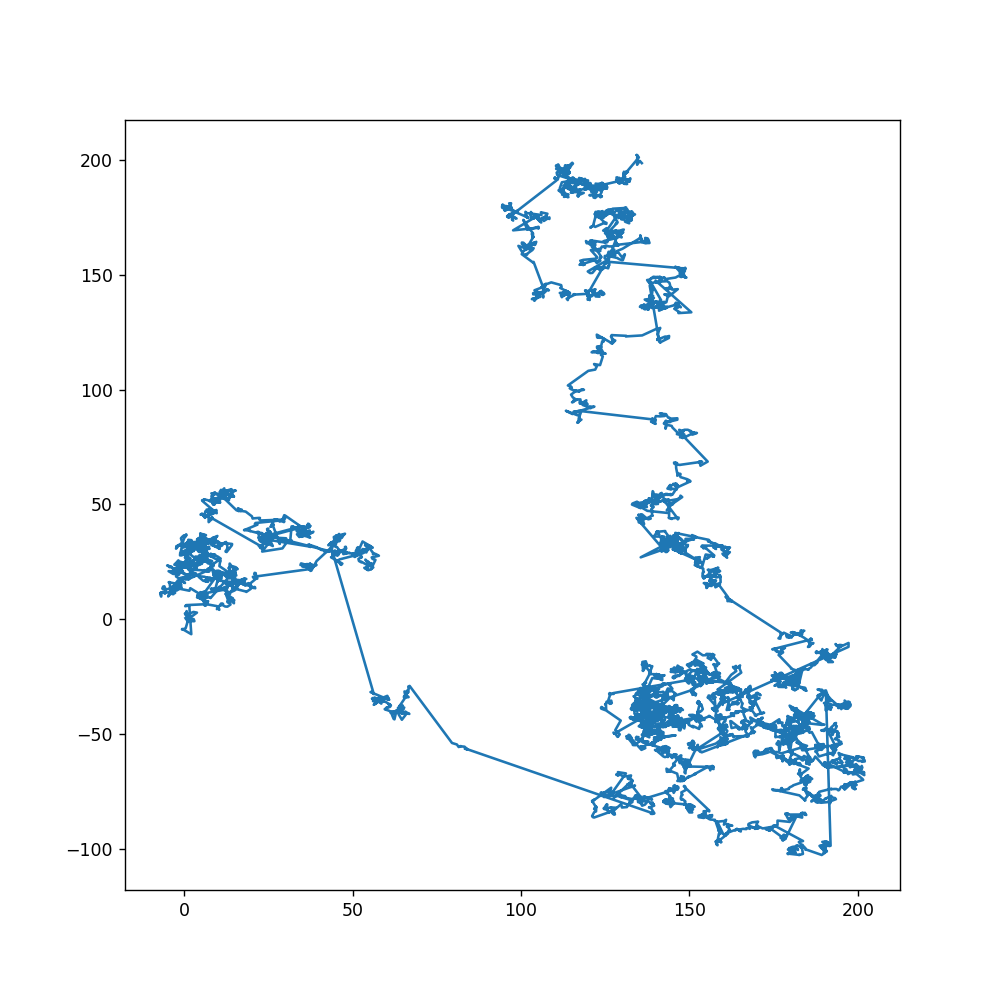

In [6]:
# Levy flight motion
import math
x = []
y = []
mu_v, kappa_v = 0.0, .3 # mean and dispersion
s_v = np.random.vonmises(mu_v, kappa_v, 10000)
mu_g, sigma_g = 1, 1 # mean and standard deviation
s_g = np.random.normal(mu_g, sigma_g, 10000)

beta = 1.7
# 0<beta<2
sigma_v = 1
sigma_u = ( ( math.gamma(1+beta)*np.sin(np.pi*beta/2) ) / ( beta*math.gamma((1+beta)/2)*2**((beta-1)/2) ) )**(1/beta)


    
u = np.random.normal(0, sigma_u, size=10000)
v = np.random.normal(0, sigma_v, size=10000)
s_l = u/(np.abs(v)**(1/beta))

robot1 = robot(0,0,0)
for i in range(10000):
    robot1.move_rw(s_l[i],normalize(s_v[i]))
    x.append(robot1.x)
    y.append(robot1.y)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x,y)    